<a href="https://colab.research.google.com/github/NancyBudgujjar/Liver-Disease-Prediction/blob/main/Final_GEC_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/uciml/indian-liver-patient-records

Prediction of Liver Disease using Random Forest classifierand balancing imbalanced data.
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India.
The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease).
This data set contains 441 male patient records and 142 female patient records.Any patient whose age exceeded 89 is listed as being of age "90".





In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/project/indian_liver_patient.csv')
df.shape

(583, 11)

In [4]:
df['Dataset'].value_counts()  # 1 = Liver disease and 2 is no disease

1    416
2    167
Name: Dataset, dtype: int64

In [5]:
categories = {1: 1, 2: 0}   #Now we map 1 = 1(Liver disease), 2 = 0(no disease)
df['Dataset'] = df['Dataset'].replace(categories)

#Define the dependent variable that needs to be predicted (labels)
#Y = df["Label"].values

In [6]:
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.describe().T  #Values need to be normalized before fitting.

count        mean         std   min    25%  \
Age                         583.0   44.746141   16.189833   4.0   33.0   
Total_Bilirubin             583.0    3.298799    6.209522   0.4    0.8   
Direct_Bilirubin            583.0    1.486106    2.808498   0.1    0.2   
Alkaline_Phosphotase        583.0  290.576329  242.937989  63.0  175.5   
Alamine_Aminotransferase    583.0   80.713551  182.620356  10.0   23.0   
Aspartate_Aminotransferase  583.0  109.910806  288.918529  10.0   25.0   
Total_Protiens              583.0    6.483190    1.085451   2.7    5.8   
Albumin                     583.0    3.141852    0.795519   0.9    2.6   
Albumin_and_Globulin_Ratio  579.0    0.947064    0.319592   0.3    0.7   
Dataset                     583.0    0.713551    0.452490   0.0    0.0   

                               50%    75%     max  
Age                          45.00   58.0    90.0  
Total_Bilirubin               1.00    2.6    75.0  
Direct_Bilirubin              0.30    1.3    19.7  
Alkaline_Phosphotase        208.00  298.0  2110.0  
Alamine_Aminotransferase     35.00   60.5  2000.0  
Aspartate_Aminotransferase   42.00   87.0  4929.0  
Total_Protiens                6.60    7.2     9.6  
Albumin                       3.10    3.8     5.5  
Albumin_and_Globulin_Ratio    0.93    1.1     2.8  
Dataset                       1.00    1.0     1.0

In [9]:
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [10]:
print(df['Albumin_and_Globulin_Ratio'].mean())

0.9470639032815197


In [11]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(0.947)
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [12]:
df.duplicated().sum()

13

Since there is no unique patient identifier against each observation, and since it is highly improbable that two subjects have the same exact feature values, its safe to say that these records are possibly duplicates. I will remove these.

In [13]:
df[df.duplicated]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
19    40  Female              0.9               0.3                   293   
26    34    Male              4.1               2.0                   289   
34    38  Female              2.6               1.2                   410   
55    42    Male              8.9               4.5                   272   
62    58    Male              1.0               0.5                   158   
106   36    Male              5.3               2.3                   145   
108   36    Male              0.8               0.2                   158   
138   18    Male              0.8               0.2                   282   
143   30    Male              1.6               0.4                   332   
158   72    Male              0.7               0.1                   196   
164   39    Male              1.9               0.9                   180   
174   31    Male              0.6               0.1                   175   
201   49    Male              0.6               0.1                   218   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
19                        232                         245             6.8   
26                        875                         731             5.0   
34                         59                          57             5.6   
55                         31                          61             5.8   
62                         37                          43             7.2   
106                        32                          92             5.1   
108                        29                          39             6.0   
138                        72                         140             5.5   
143                        84                         139             5.6   
158                        20                          35             5.8   
164                        42                          62             7.4   
174                        48                          34             6.0   
201                        50                          53             5.0   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
19       3.1                        0.80        1  
26       2.7                        1.10        1  
34       3.0                        0.80        0  
55       2.0                        0.50        1  
62       3.6                        1.00        1  
106      2.6                        1.00        0  
108      2.2                        0.50        0  
138      2.5                        0.80        1  
143      2.7                        0.90        1  
158      2.0                        0.50        1  
164      4.3                        1.38        1  
174      3.7                        1.60        1  
201      2.4                        0.90        1

In [14]:
df = df.drop_duplicates().reset_index().drop('index', axis = 1)

In [15]:
df.shape

(570, 11)

In [16]:
df = df.rename(columns={'Dataset':'Label'}) #Rename Dataset to Label to make it easy to understand
print(df.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object


<Axes: xlabel='Label', ylabel='count'>

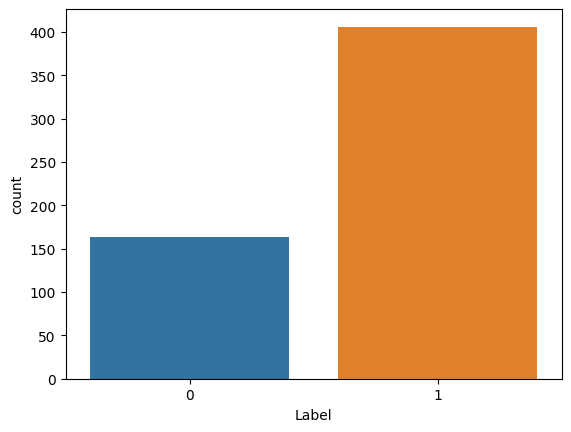

In [17]:
sns.countplot(x="Label", data=df)

<Axes: xlabel='Label', ylabel='count'>

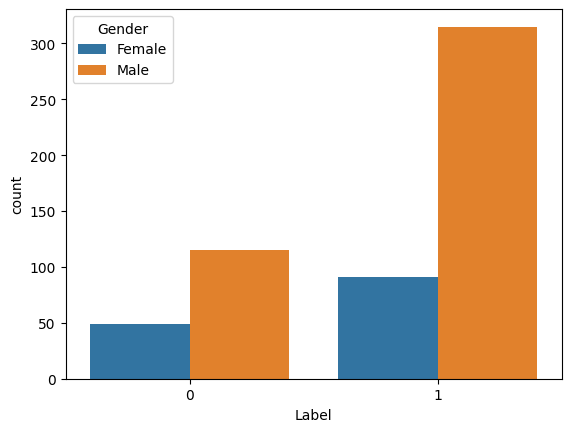

In [18]:
sns.countplot(x="Label", hue="Gender", data=df)

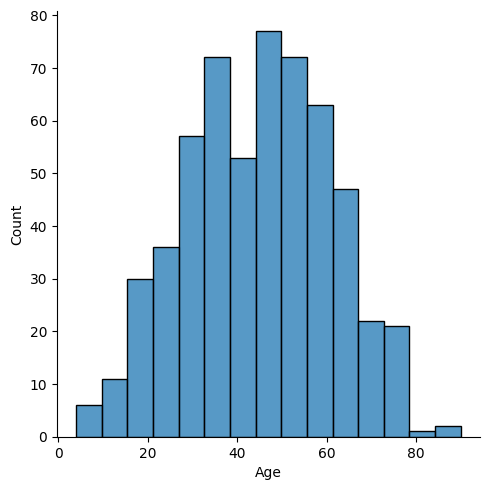

In [19]:
sns.displot(df['Age'], kde=False)

<Axes: xlabel='Age', ylabel='count'>

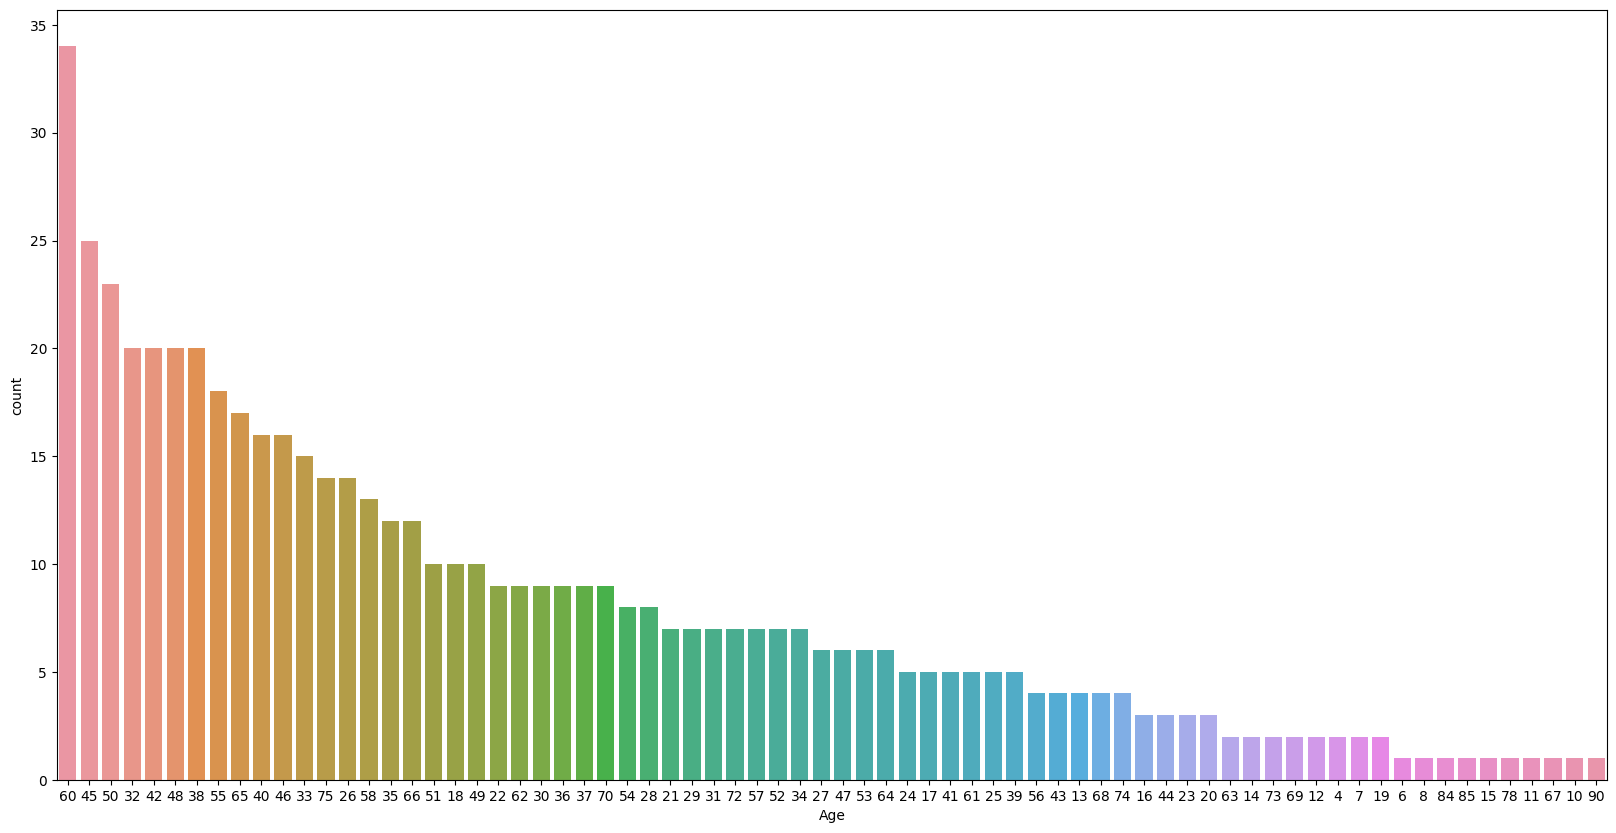

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)

<Axes: xlabel='Label', ylabel='Albumin'>

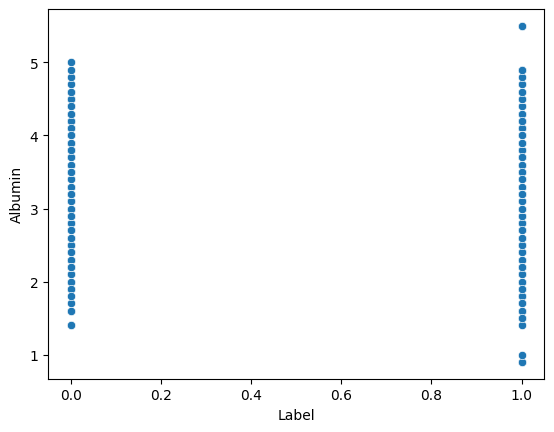

In [21]:
sns.scatterplot(x="Label", y="Albumin", data=df)  #Seems no trend between labels 0 and 1

<Axes: xlabel='Label', ylabel='Albumin_and_Globulin_Ratio'>

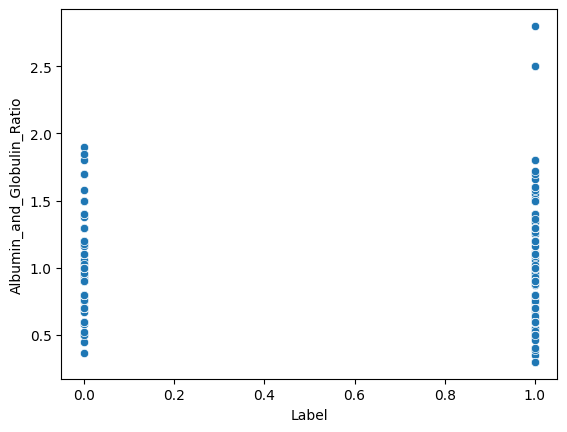

In [22]:
sns.scatterplot(x="Label", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 0 and 1

<Axes: xlabel='Albumin', ylabel='Albumin_and_Globulin_Ratio'>

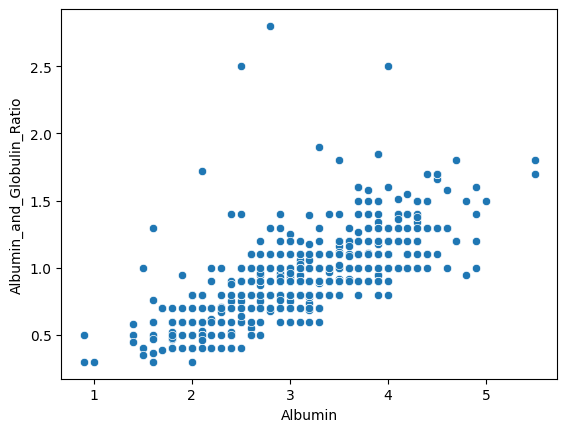

In [23]:
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 0 and 1

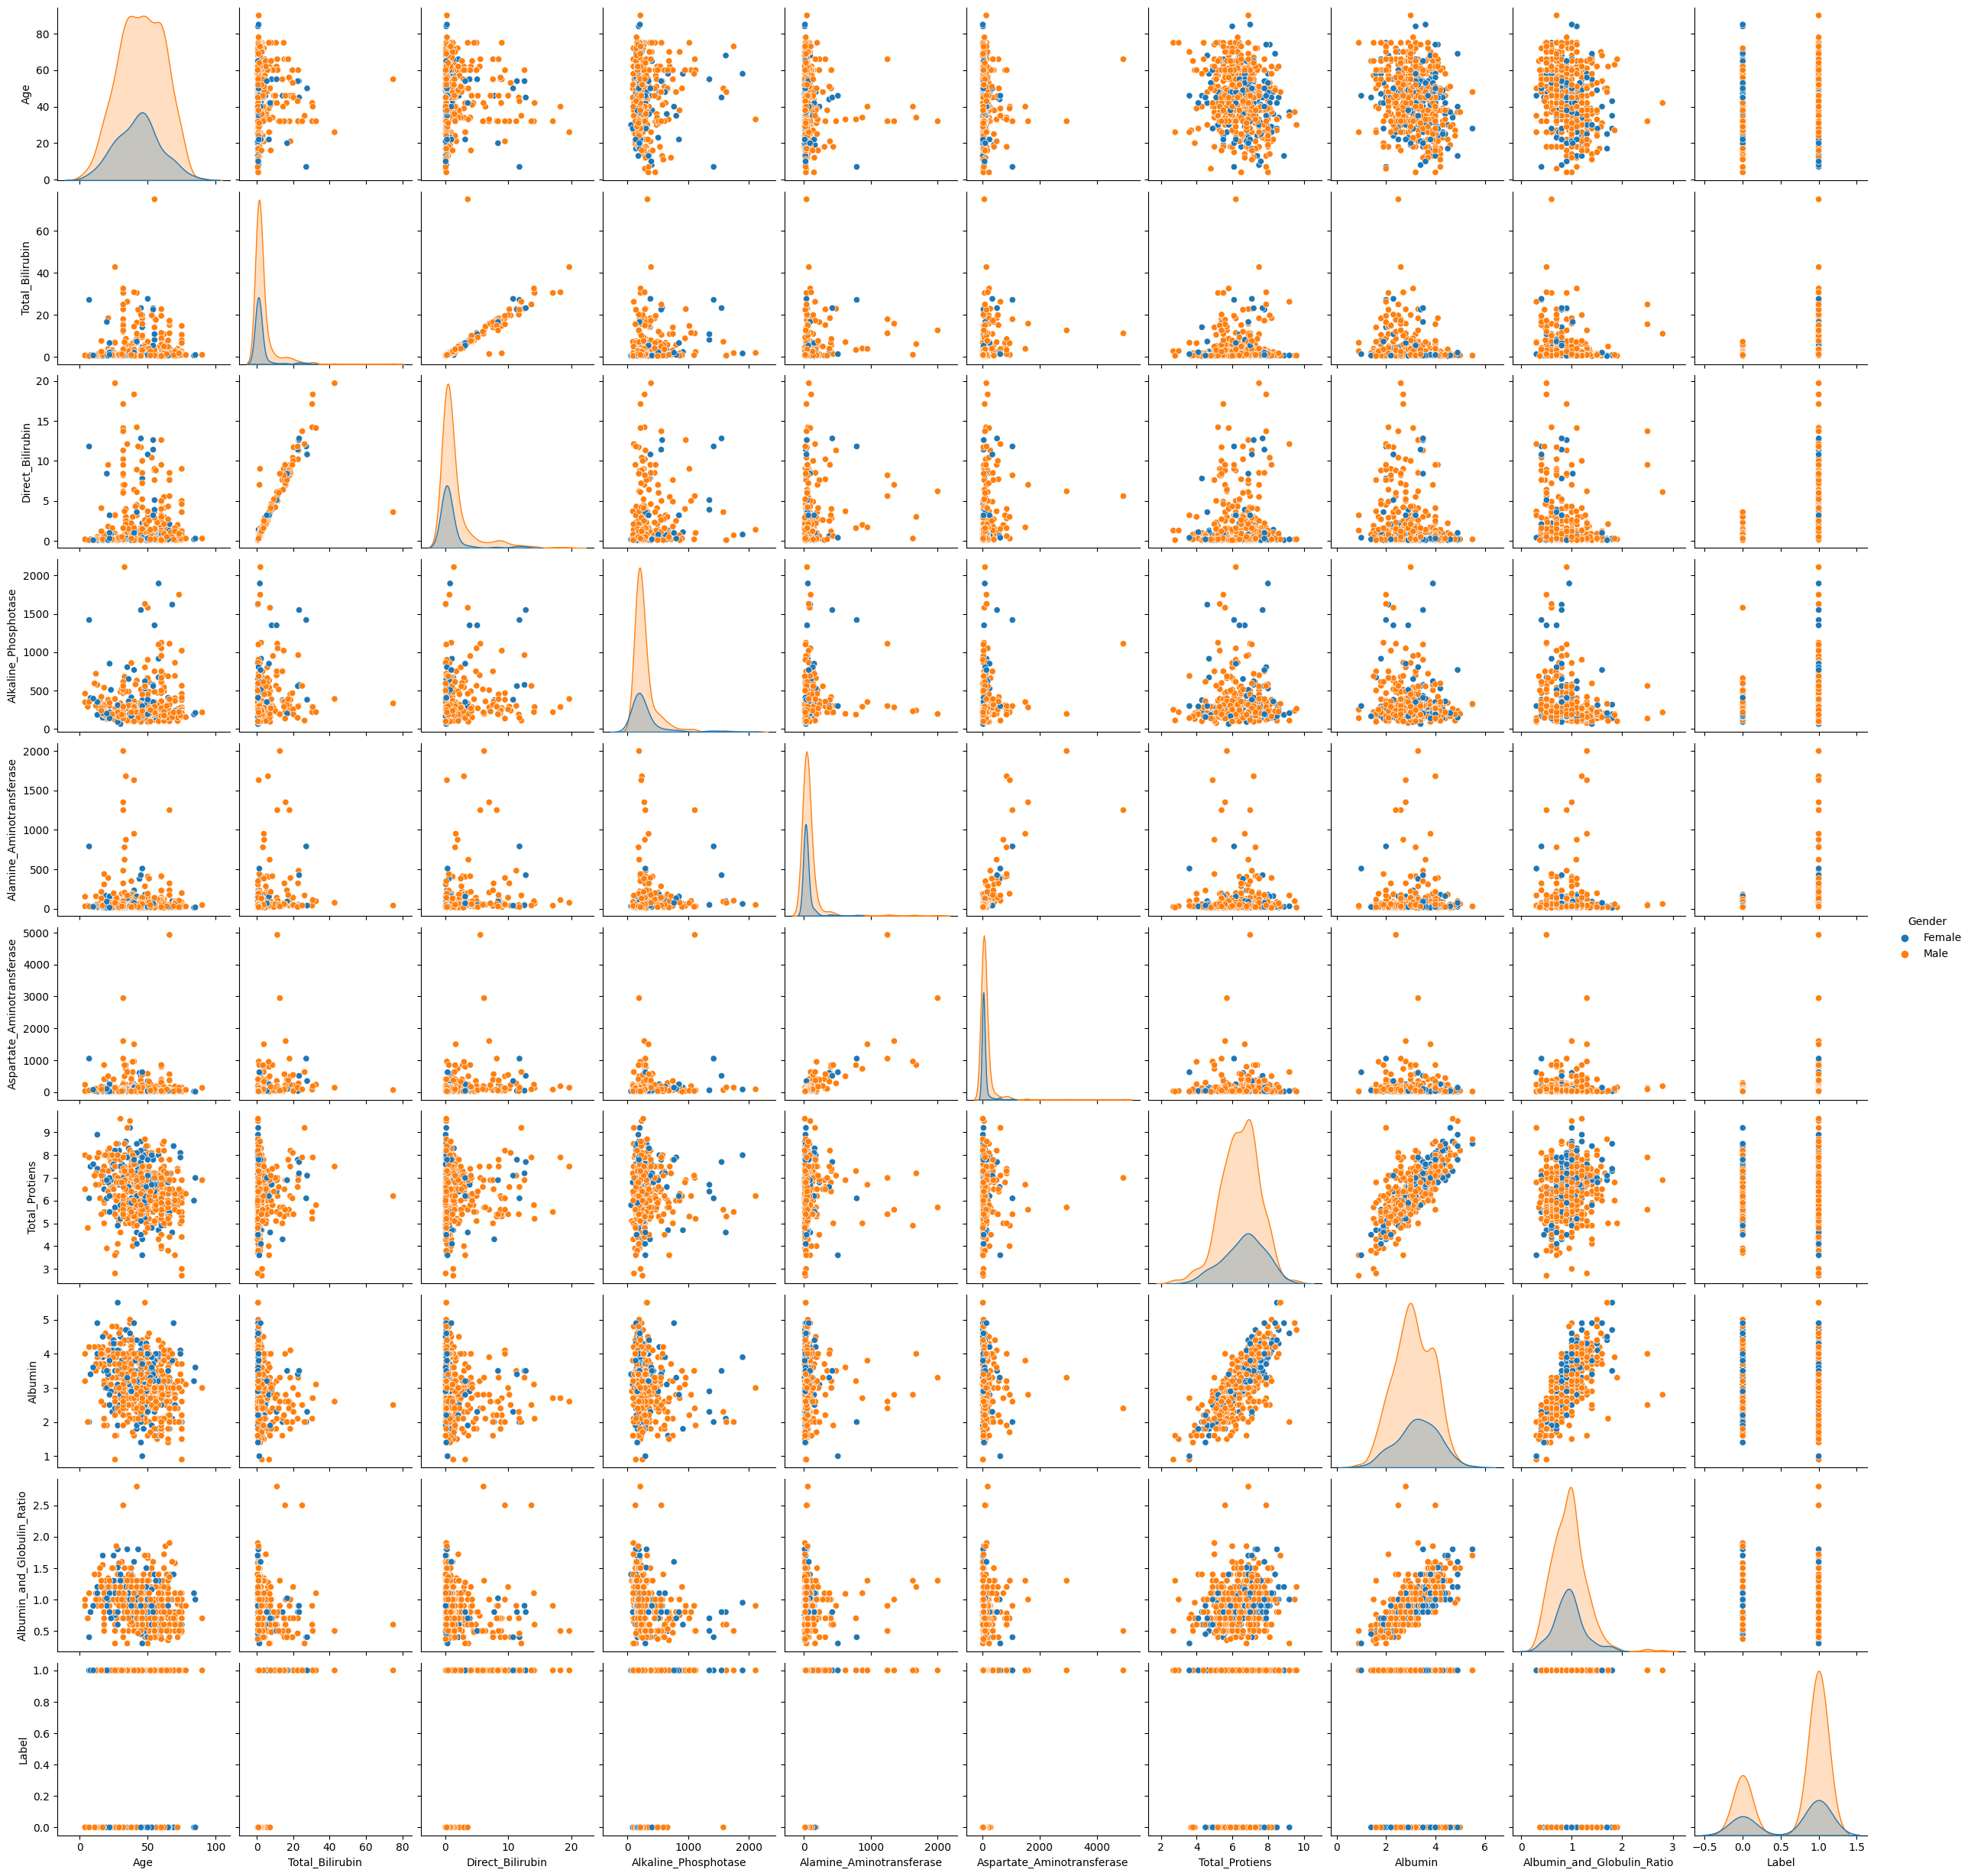

In [24]:
sns.pairplot(df, hue='Gender')

<ipython-input-25-f92d98c36930>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

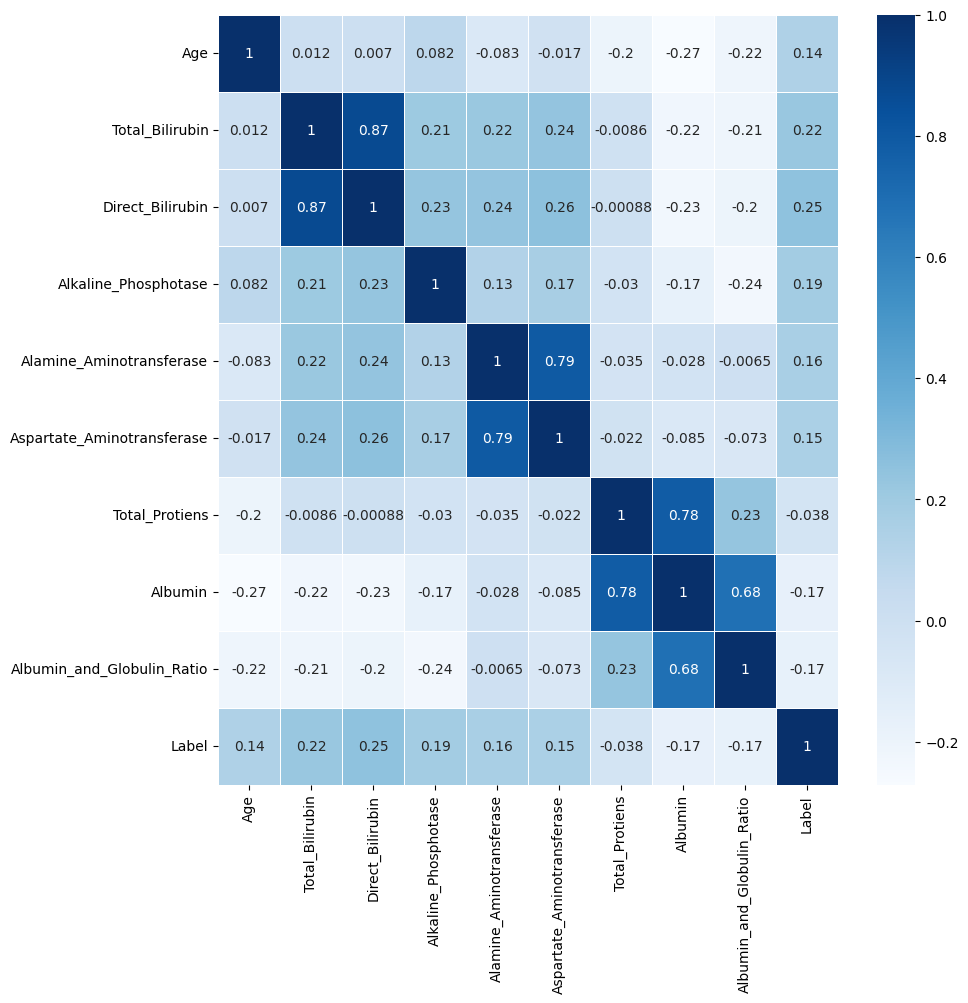

In [25]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="Blues",linewidths=.5, annot=True) #May be Gender and total protien not big factors influencing the label

In [26]:
df['Gender'].value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

In [27]:
categories = {"Male":1, "Female":0} #Replace categorical values with numbers
df['Gender'] = df['Gender'].replace(categories)

Y = df["Label"].values
X = df.drop(labels = ["Label"], axis=1)

In [28]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets into 80,20 %
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(456, 10)
(456,)


In [29]:
from keras.utils import normalize
X = normalize(X, axis=1)

# Technique 1: Appropriate Model Selection

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

models= [
         ('Logestic Regression',LogisticRegression(max_iter=900)),
         ('SVM',SVC(kernel='linear')),
         ('Random Forest Classifier',RandomForestClassifier()),
         ('KNeighbors Classifier',KNeighborsClassifier()),
         ('Decision Tree', DecisionTreeClassifier()),
         ('AdaBoost Classifier',AdaBoostClassifier()),
         ('XGB Classifier',XGBClassifier()),
         ('GaussianNB',GaussianNB ())]

ModelName = []
Train_Acc = []
Test_Acc = []

for name, model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)

    ModelName.extend([name])
    Train_Acc.extend([train_acc])
    Test_Acc.extend([test_acc])

print(pd.DataFrame({'ModelName': ModelName,
                    'Train_Acc': Train_Acc,
                    'Test_Acc': Test_Acc  }))

                  ModelName  Train_Acc  Test_Acc
0       Logestic Regression   0.723684  0.710526
1                       SVM   0.703947  0.736842
2  Random Forest Classifier   1.000000  0.736842
3     KNeighbors Classifier   0.807018  0.649123
4             Decision Tree   1.000000  0.578947
5       AdaBoost Classifier   0.817982  0.719298
6            XGB Classifier   1.000000  0.728070
7                GaussianNB   0.578947  0.517544


Logistic regression :- Can be very slow.

SVM :- can also be extremely slow.

Random Forest :- ideal for imbalanced datasets.

Random Forest

In [31]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train, y_train) # Train the model on training data

#importances = list(model_RF.feature_importances_)
features_list = list(X.columns)
feature_imp = pd.Series(model_RF.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

Alkaline_Phosphotase          0.144368
Alamine_Aminotransferase      0.137858
Aspartate_Aminotransferase    0.122775
Total_Bilirubin               0.120847
Age                           0.115994
Albumin                       0.104555
Total_Protiens                0.088695
Albumin_and_Globulin_Ratio    0.087743
Direct_Bilirubin              0.065706
Gender                        0.011458
dtype: float64


In [32]:
prediction_test_RF = model_RF.predict(X_test) #Test prediction on testing data.
print("METRICS FOR IMBALANCED DATA: ") #ACCURACY METRICS
print ("  Accuracy =", metrics.accuracy_score(y_test, prediction_test_RF))
print()

(unique, counts) = np.unique(prediction_test_RF, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test_RF)
print("Confusion Metrics: \n", cm)

METRICS FOR IMBALANCED DATA: 
  Accuracy = 0.7631578947368421

Count of predicted label: [0 1] [20 94]

Confusion Metrics: 
 [[11 18]
 [ 9 76]]


means 8 out of 18 labled are correctly as 0(healthy patient) and 10/18 are mislablled as 1, i.e., 10 are healthy patients but still labelled as 1.

75 out of 96 are correctly labled and 21 are mislablled.

Precision Values for: 
  Healthy Patients with no disease = 0.55
  Patients With Liver disease = 0.8085106382978723

Recall Values for: 
  Healthy Patients with no disease =  0.3793103448275862
  Healthy Patients With Liver disease =  0.8941176470588236

F-Measure Values for: 
  Healthy Patients with no disease =  0.4489795918367347
  Patients with liver disease =  0.8491620111731844

ROC_AUC score for imbalanced data is:  0.6367139959432049



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


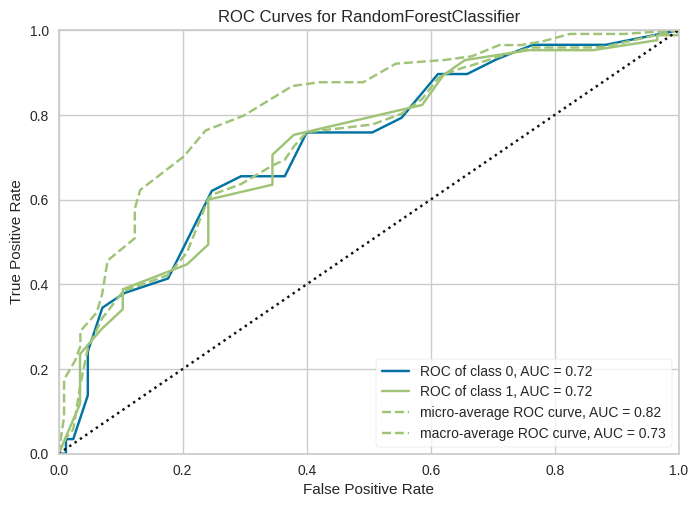

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [33]:
#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn
print("ROC_AUC score for imbalanced data is: ", roc_auc_score(y_test, prediction_test_RF))
print()

from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF)  #Create object
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)
roc_auc.show()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

# Handling Imbalanced data

Technique 1: Generate synthetic data
SMOTE: Synthetic Minority Oversampling Technique

https://imbalanced-learn.org/stable/over_sampling.html?highlight=smote

SMOTE may not be the best choice all the time. It is one of many things
that you need to explore.

In [34]:
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X, Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0 1] [164 406]
After SMOTE:  [0 1] [406 406]


LOGISTIC REGRESSION


Accuracy: 0.6319018404907976

Count of predicted label: [0 1] [109  54]

Confusion Metrics: 
 [[70 21]
 [39 33]]

Precision Values for: 
  Healthy Patients with no disease = 0.6422018348623854
  Patients With Liver disease = 0.6111111111111112

Recall Values for: 
  Healthy Patients with no disease =  0.7692307692307693
  Healthy Patients With Liver disease =  0.4583333333333333

F-Measure Values for: 
  Healthy Patients with no disease =  0.7
  Patients with liver disease =  0.5238095238095238

ROC AUC score for Logestic Regression model after SMOTE:  0.6137820512820512



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


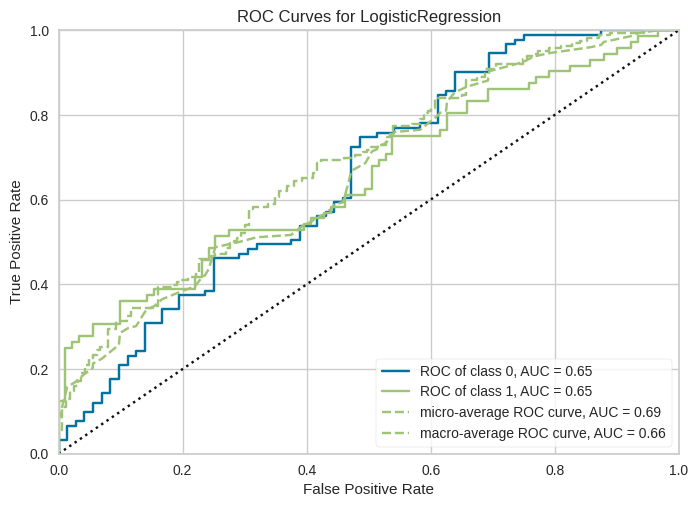

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [35]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smote, y_train_smote)
LR_prediction_smote = model_LR.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, LR_prediction_smote)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smote, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, LR_prediction_smote)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logestic Regression model after SMOTE: ",roc_auc_score(y_test_smote, LR_prediction_smote))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

SVM

In [36]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_smote, y_train_smote)
SVM_prediction_smote = model_SVM.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, SVM_prediction_smote)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(SVM_prediction_smote, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, SVM_prediction_smote)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for SVM model after SMOTE: ",roc_auc_score(y_test_smote, SVM_prediction_smote))

Accuracy: 0.6503067484662577

Count of predicted label: [0 1] [134  29]

Confusion Metrics: 
 [[84  7]
 [50 22]]

Precision Values for: 
  Healthy Patients with no disease = 0.6268656716417911
  Patients With Liver disease = 0.7586206896551724

Recall Values for: 
  Healthy Patients with no disease =  0.9230769230769231
  Healthy Patients With Liver disease =  0.3055555555555556

F-Measure Values for: 
  Healthy Patients with no disease =  0.7466666666666667
  Patients with liver disease =  0.4356435643564357

ROC AUC score for SVM model after SMOTE:  0.6143162393162394


RANDOM FOREST

Accuracy =  0.7852760736196319

Count of predicted labels:  [0 1] [104  59]

Confusion Metrics after SMOTE: 
 [[80 11]
 [24 48]]

Precision Values for: 
  Healthy Patients with no disease = 0.7692307692307693
  Patients With Liver disease = 0.8135593220338984

Recall Values for: 
  Healthy Patients with no disease =  0.8791208791208791
  Healthy Patients With Liver disease =  0.6666666666666666

F-Measure Values for: 
  Healthy Patients with no disease =  0.8205128205128205
  Patients with liver disease =  0.732824427480916

ROC AUC score for Random Forest model after SMOTE:  0.7728937728937728



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


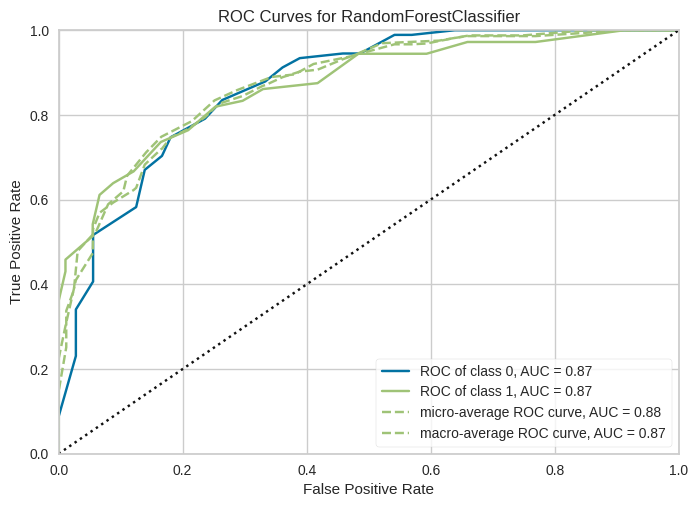

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [37]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)

RF_prediction_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, RF_prediction_smote))
print()

(unique, counts) = np.unique(RF_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, RF_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after SMOTE: ",roc_auc_score(y_test_smote, RF_prediction_smote))
print()

roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

KNN

Accuracy =  0.6993865030674846

Count of predicted labels:  [0 1] [114  49]

Confusion Metrics after SMOTE: 
 [[78 13]
 [36 36]]

Precision Values for: 
  Healthy Patients with no disease = 0.6842105263157895
  Patients With Liver disease = 0.7346938775510204

Recall Values for: 
  Healthy Patients with no disease =  0.8571428571428571
  Healthy Patients With Liver disease =  0.5

F-Measure Values for: 
  Healthy Patients with no disease =  0.7609756097560976
  Patients with liver disease =  0.5950413223140496

ROC AUC score for KNN model after SMOTE:  0.6785714285714286



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


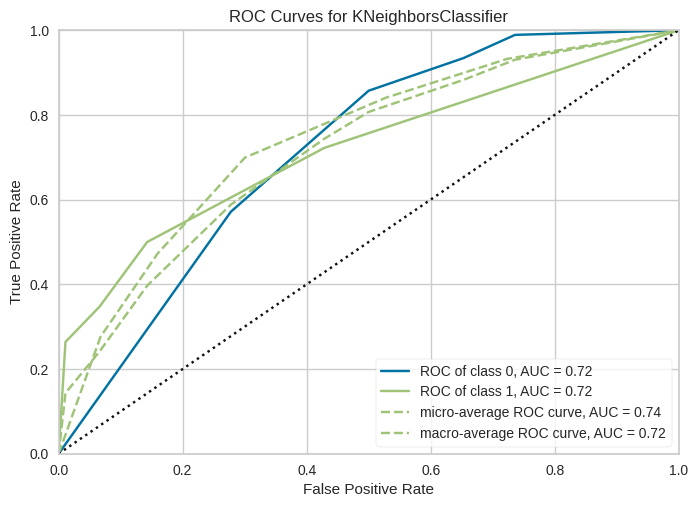

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [38]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smote, y_train_smote)

KNN_prediction_smote = model_KNN.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, KNN_prediction_smote))
print()

(unique, counts) = np.unique(KNN_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, KNN_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for KNN model after SMOTE: ",roc_auc_score(y_test_smote, KNN_prediction_smote))
print()

roc_auc=ROCAUC(model_KNN)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

Decision Tree


Accuracy =  0.7239263803680982

Count of predicted labels:  [0 1] [96 67]

Confusion Metrics after SMOTE: 
 [[71 20]
 [25 47]]

Precision Values for: 
  Healthy Patients with no disease = 0.7395833333333334
  Patients With Liver disease = 0.7014925373134329

Recall Values for: 
  Healthy Patients with no disease =  0.7802197802197802
  Healthy Patients With Liver disease =  0.6527777777777778

F-Measure Values for: 
  Healthy Patients with no disease =  0.7593582887700535
  Patients with liver disease =  0.6762589928057554

ROC AUC score for Decision Tree model after SMOTE:  0.7164987789987789



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


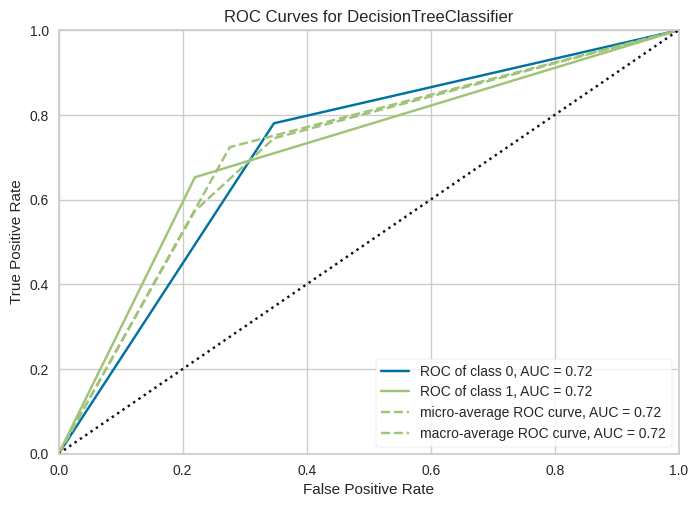

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [39]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smote, y_train_smote)

DT_prediction_smote = model_DT.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, DT_prediction_smote))
print()

(unique, counts) = np.unique(DT_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, DT_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after SMOTE: ",roc_auc_score(y_test_smote, DT_prediction_smote))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

ADABOOST

Accuracy =  0.7177914110429447

Count of predicted labels:  [0 1] [97 66]

Confusion Metrics after SMOTE: 
 [[71 20]
 [26 46]]

Precision Values for: 
  Healthy Patients with no disease = 0.7319587628865979
  Patients With Liver disease = 0.696969696969697

Recall Values for: 
  Healthy Patients with no disease =  0.7802197802197802
  Healthy Patients With Liver disease =  0.6388888888888888

F-Measure Values for: 
  Healthy Patients with no disease =  0.7553191489361702
  Patients with liver disease =  0.6666666666666666

ROC AUC score for AdaBoost model after SMOTE:  0.7095543345543345



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


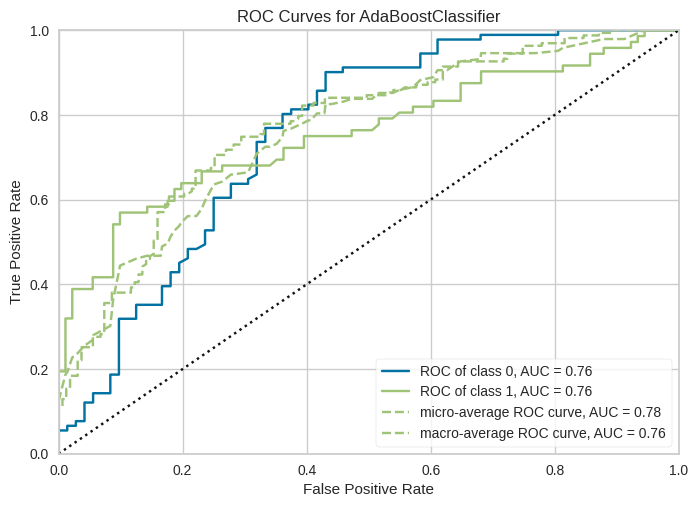

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [40]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smote, y_train_smote)

AdaBoost_prediction_smote = model_AdaBoost.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, AdaBoost_prediction_smote))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, AdaBoost_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for AdaBoost model after SMOTE: ",roc_auc_score(y_test_smote, AdaBoost_prediction_smote))
print()

roc_auc=ROCAUC(model_AdaBoost)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

XGBoost

Accuracy =  0.7300613496932515

Count of predicted labels:  [0 1] [93 70]

Confusion Metrics after SMOTE: 
 [[70 21]
 [23 49]]

Precision Values for: 
  Healthy Patients with no disease = 0.7526881720430108
  Patients With Liver disease = 0.7

Recall Values for: 
  Healthy Patients with no disease =  0.7692307692307693
  Healthy Patients With Liver disease =  0.6805555555555556

F-Measure Values for: 
  Healthy Patients with no disease =  0.7608695652173912
  Patients with liver disease =  0.6901408450704225

ROC AUC score for XGBoost model after SMOTE:  0.7248931623931624



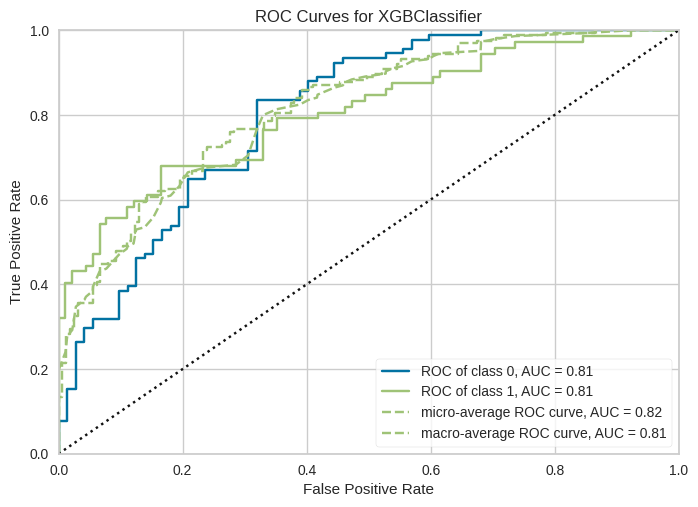

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smote, y_train_smote)

XGB_prediction_smote = model_XGB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, XGB_prediction_smote))
print()

(unique, counts) = np.unique(XGB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, XGB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBoost model after SMOTE: ",roc_auc_score(y_test_smote, XGB_prediction_smote))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

#Handling Imbalanced Data using SMOTEENN
It combines SMOTE and Edited Nearest Neighbours(ENN)

In [42]:
'''
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, Y)
'''

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTEENN: ", unique2, counts2)

X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0 1] [164 406]
After SMOTEENN:  [0 1] [216 153]


Logistic Regression

Accuracy of Logistic Regression after SMOTEENN: 0.7972972972972973

Count of predicted label: [0 1] [56 18]

Confusion Metrics: 
 [[43  2]
 [13 16]]

Precision Values for: 
  Healthy Patients with no disease = 0.7678571428571429
  Patients With Liver disease = 0.8888888888888888

Recall Values for: 
  Healthy Patients with no disease =  0.9555555555555556
  Healthy Patients With Liver disease =  0.5517241379310345

F-Measure Values for: 
  Healthy Patients with no disease =  0.8514851485148515
  Patients with liver disease =  0.6808510638297872

ROC AUC score for Logistic Regression model after SMOTEENN:  0.7536398467432951



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


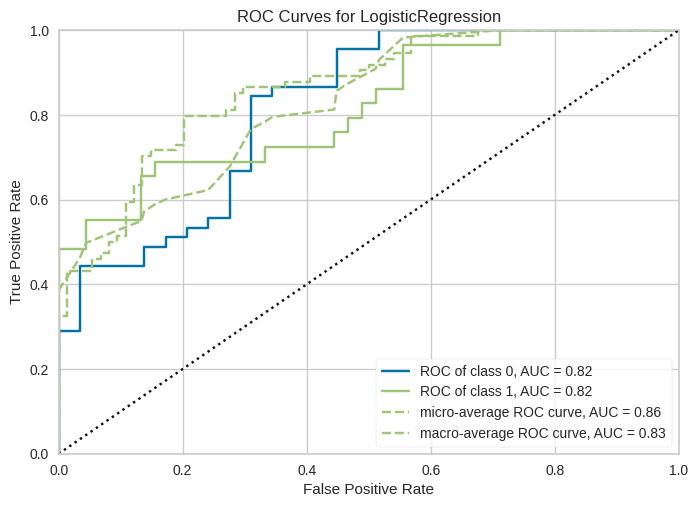

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteenn, y_train_smoteenn)
LR_prediction_smoteenn = model_LR.predict(X_test_smoteenn)

accuracy = metrics.accuracy_score(y_test_smoteenn, LR_prediction_smoteenn)
print("Accuracy of Logistic Regression after SMOTEENN:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteenn, LR_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after SMOTEENN: ", roc_auc_score(y_test_smoteenn, LR_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

SVM

In [44]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_smoteenn, y_train_smoteenn)
SVM_prediction_smoteenn = model_SVM.predict(X_test_smoteenn)

accuracy = metrics.accuracy_score(y_test_smoteenn, SVM_prediction_smoteenn)
print("Accuracy of SVM after SMOTEENN:", accuracy)
print()
(unique, counts) = np.unique(SVM_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteenn, SVM_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for SVM model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, SVM_prediction_smoteenn))

Accuracy of SVM after SMOTEENN: 0.7837837837837838

Count of predicted label: [0 1] [59 15]

Confusion Metrics: 
 [[44  1]
 [15 14]]

Precision Values for: 
  Healthy Patients with no disease = 0.7457627118644068
  Patients With Liver disease = 0.9333333333333333

Recall Values for: 
  Healthy Patients with no disease =  0.9777777777777777
  Healthy Patients With Liver disease =  0.4827586206896552

F-Measure Values for: 
  Healthy Patients with no disease =  0.8461538461538463
  Patients with liver disease =  0.6363636363636364

ROC AUC score for SVM model after SMOTEENN:  0.7302681992337166


RANDOM FOREST

Accuracy of Random Forest after SMOTEENN =  0.8783783783783784

Count of predicted labels:  [0 1] [42 32]

Confusion Metrics after SMOTE: 
 [[39  6]
 [ 3 26]]

Precision Values for: 
  Healthy Patients with no disease = 0.9285714285714286
  Patients With Liver disease = 0.8125

Recall Values for: 
  Healthy Patients with no disease =  0.8666666666666667
  Healthy Patients With Liver disease =  0.896551724137931

F-Measure Values for: 
  Healthy Patients with no disease =  0.896551724137931
  Patients with liver disease =  0.8524590163934426

ROC AUC score for Random Forest model after SMOTEENN:  0.8816091954022989



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


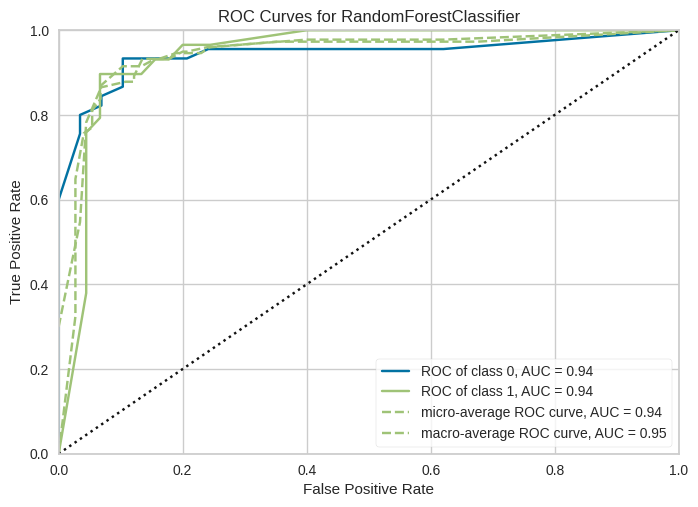

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteenn, y_train_smoteenn)

RF_prediction_smoteenn = model_RF.predict(X_test_smoteenn)
print ("Accuracy of Random Forest after SMOTEENN = ", metrics.accuracy_score(y_test_smoteenn, RF_prediction_smoteenn))
print()

(unique, counts) = np.unique(RF_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, RF_prediction_smoteenn)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, RF_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_RF)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

KNN

Accuracy =  0.918918918918919

Count of predicted labels:  [0 1] [47 27]

Confusion Metrics after SMOTEENN: 
 [[43  2]
 [ 4 25]]

Precision Values for: 
  Healthy Patients with no disease = 0.9148936170212766
  Patients With Liver disease = 0.9259259259259259

Recall Values for: 
  Healthy Patients with no disease =  0.9555555555555556
  Healthy Patients With Liver disease =  0.8620689655172413

F-Measure Values for: 
  Healthy Patients with no disease =  0.9347826086956522
  Patients with liver disease =  0.8928571428571429

ROC AUC score for KNN model after SMOTEENN:  0.9088122605363985



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


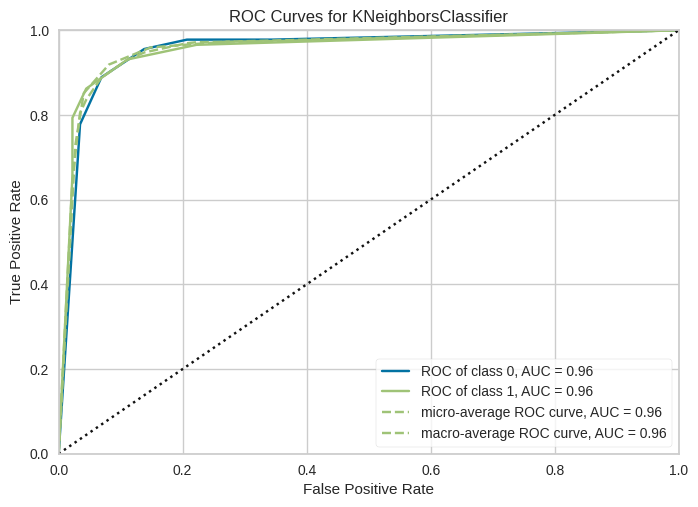

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [46]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smoteenn, y_train_smoteenn)

KNN_prediction_smoteenn = model_KNN.predict(X_test_smoteenn)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteenn, KNN_prediction_smoteenn))
print()

(unique, counts) = np.unique(KNN_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, KNN_prediction_smoteenn)
print("Confusion Metrics after SMOTEENN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for KNN model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, KNN_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_KNN)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

Decision Tree

Accuracy =  0.8648648648648649

Count of predicted labels:  [0 1] [39 35]

Confusion Metrics after SMOTEENN: 
 [[37  8]
 [ 2 27]]

Precision Values for: 
  Healthy Patients with no disease = 0.9487179487179487
  Patients With Liver disease = 0.7714285714285715

Recall Values for: 
  Healthy Patients with no disease =  0.8222222222222222
  Healthy Patients With Liver disease =  0.9310344827586207

F-Measure Values for: 
  Healthy Patients with no disease =  0.8809523809523809
  Patients with liver disease =  0.8437500000000001

ROC AUC score for Decision Tree model after SMOTEENN:  0.8766283524904213



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


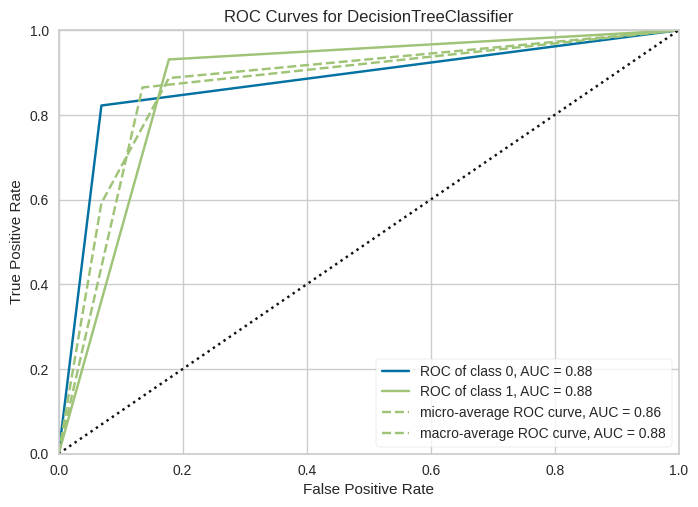

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [47]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteenn, y_train_smoteenn)

DT_prediction_smoteenn = model_DT.predict(X_test_smoteenn)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteenn, DT_prediction_smoteenn))
print()

(unique, counts) = np.unique(DT_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, DT_prediction_smoteenn)
print("Confusion Metrics after SMOTEENN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, DT_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

AdaBoost

Accuracy =  0.918918918918919

Count of predicted labels:  [0 1] [43 31]

Confusion Metrics after SMOTEENN: 
 [[41  4]
 [ 2 27]]

Precision Values for: 
  Healthy Patients with no disease = 0.9534883720930233
  Patients With Liver disease = 0.8709677419354839

Recall Values for: 
  Healthy Patients with no disease =  0.9111111111111111
  Healthy Patients With Liver disease =  0.9310344827586207

F-Measure Values for: 
  Healthy Patients with no disease =  0.9318181818181819
  Patients with liver disease =  0.9

ROC AUC score for AdaBoost model after SMOTEENN:  0.9210727969348658



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


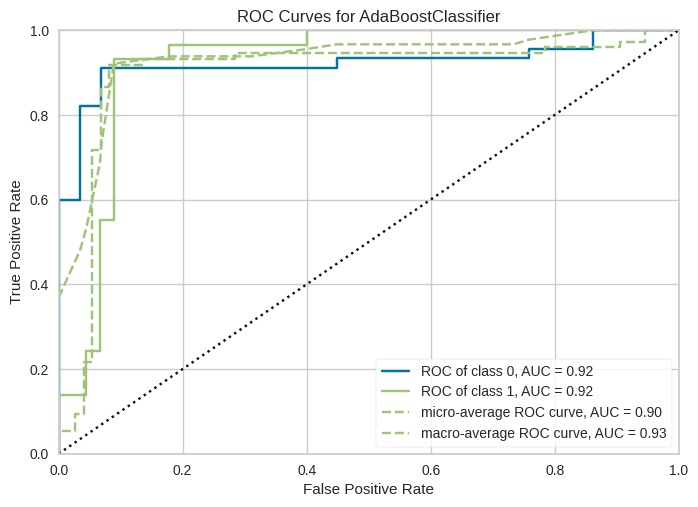

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [48]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteenn, y_train_smoteenn)

AdaBoost_prediction_smoteenn = model_AdaBoost.predict(X_test_smoteenn)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteenn, AdaBoost_prediction_smoteenn))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, AdaBoost_prediction_smoteenn)
print("Confusion Metrics after SMOTEENN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for AdaBoost model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, AdaBoost_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_AdaBoost)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

XGBOOST

Accuracy =  0.918918918918919

Count of predicted labels:  [0 1] [43 31]

Confusion Metrics after SMOTEENN: 
 [[41  4]
 [ 2 27]]

Precision Values for: 
  Healthy Patients with no disease = 0.9534883720930233
  Patients With Liver disease = 0.8709677419354839

Recall Values for: 
  Healthy Patients with no disease =  0.9111111111111111
  Healthy Patients With Liver disease =  0.9310344827586207

F-Measure Values for: 
  Healthy Patients with no disease =  0.9318181818181819
  Patients with liver disease =  0.9

ROC AUC score for XGBoost model after SMOTEENN:  0.9210727969348658



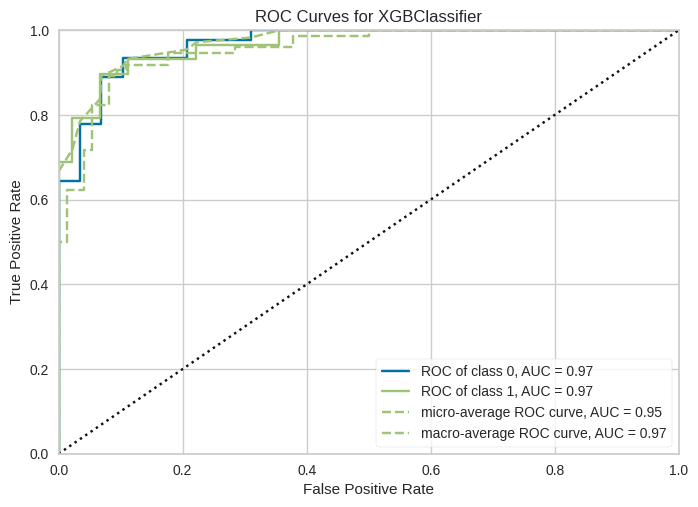

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [49]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteenn, y_train_smoteenn)

XGB_prediction_smoteenn = model_AdaBoost.predict(X_test_smoteenn)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteenn, XGB_prediction_smoteenn))
print()

(unique, counts) = np.unique(XGB_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, XGB_prediction_smoteenn)
print("Confusion Metrics after SMOTEENN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBoost model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, XGB_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

#Technique 3: ADASYN: Adaptive Synthetic

In [50]:
from imblearn.over_sampling import ADASYN

X_adasyn, Y_adasyn = ADASYN().fit_resample(X, Y)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, Y_adasyn, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique3, counts3) = np.unique(Y_adasyn, return_counts=True)
print("After ADASYN: ", unique3, counts3)

Original data:  [0 1] [164 406]
After ADASYN:  [0 1] [382 406]


Logistic Regression

Accuracy: 0.569620253164557

Count of predicted label: [0 1] [100  58]

Confusion Metrics: 
 [[57 25]
 [43 33]]

Precision Values for: 
  Healthy Patients with no disease = 0.57
  Patients With Liver disease = 0.5689655172413793

Recall Values for: 
  Healthy Patients with no disease =  0.6951219512195121
  Healthy Patients With Liver disease =  0.4342105263157895

F-Measure Values for: 
  Healthy Patients with no disease =  0.6263736263736263
  Patients with liver disease =  0.49253731343283585

ROC AUC score for Logistic Regression model after ADASYN:  0.5646662387676508



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


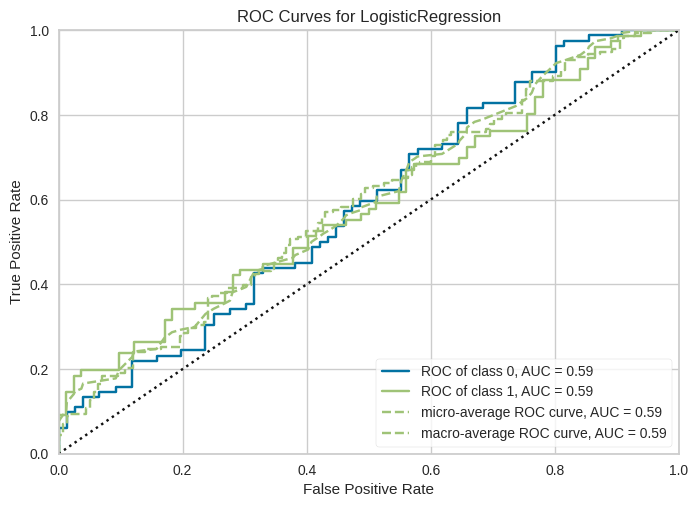

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_adasyn, y_train_adasyn)
LR_prediction_adasyn = model_LR.predict(X_test_adasyn)

accuracy = metrics.accuracy_score(y_test_adasyn, LR_prediction_adasyn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_adasyn, LR_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after ADASYN: ", roc_auc_score(y_test_adasyn, LR_prediction_adasyn))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

SVM

In [52]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_adasyn, y_train_adasyn)
SVM_prediction_adasyn = model_SVM.predict(X_test_adasyn)

accuracy = metrics.accuracy_score(y_test_adasyn, SVM_prediction_adasyn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(SVM_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_adasyn, SVM_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after ADASYN: ", roc_auc_score(y_test_adasyn, SVM_prediction_adasyn))

Accuracy: 0.5822784810126582

Count of predicted label: [0 1] [128  30]

Confusion Metrics: 
 [[72 10]
 [56 20]]

Precision Values for: 
  Healthy Patients with no disease = 0.5625
  Patients With Liver disease = 0.6666666666666666

Recall Values for: 
  Healthy Patients with no disease =  0.8780487804878049
  Healthy Patients With Liver disease =  0.2631578947368421

F-Measure Values for: 
  Healthy Patients with no disease =  0.6857142857142857
  Patients with liver disease =  0.3773584905660377

ROC AUC score for Logistic Regression model after ADASYN:  0.5706033376123235


Random Forest

Accuracy =  0.7784810126582279

Count of predicted label: [0 1] [91 67]

Confusion Metrics: 
 [[69 13]
 [22 54]]

Precision Values for: 
  Healthy Patients with no disease = 0.7582417582417582
  Patients With Liver disease = 0.8059701492537313

Recall Values for: 
  Healthy Patients with no disease =  0.8414634146341463
  Healthy Patients With Liver disease =  0.7105263157894737

F-Measure Values for: 
  Healthy Patients with no disease =  0.7976878612716763
  Patients with liver disease =  0.7552447552447553

ROC AUC score for Random Forest model after ADASYN:  0.77599486521181



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


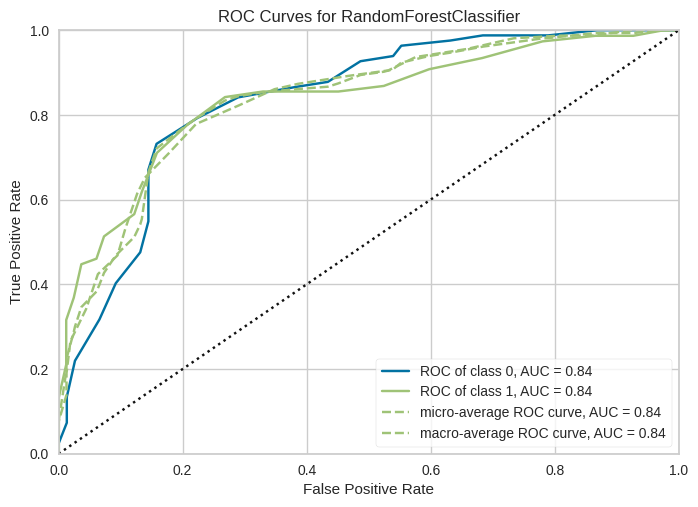

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_adasyn, y_train_adasyn)

RF_prediction_adasyn = model_RF.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, RF_prediction_adasyn))
print()
(unique, counts) = np.unique(RF_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, RF_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after ADASYN: ", roc_auc_score(y_test_adasyn, RF_prediction_adasyn))
print()

roc_auc=ROCAUC(model_RF)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

KNN

Accuracy =  0.7215189873417721

Count of predicted labels:  [0 1] [92 66]

Confusion Metrics after ADASYN: 
 [[65 17]
 [27 49]]

Precision Values for: 
  Healthy Patients with no disease = 0.7065217391304348
  Patients With Liver disease = 0.7424242424242424

Recall Values for: 
  Healthy Patients with no disease =  0.7926829268292683
  Healthy Patients With Liver disease =  0.6447368421052632

F-Measure Values for: 
  Healthy Patients with no disease =  0.7471264367816093
  Patients with liver disease =  0.6901408450704226

ROC AUC score for KNN model after ADASYN:  0.7187098844672658



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


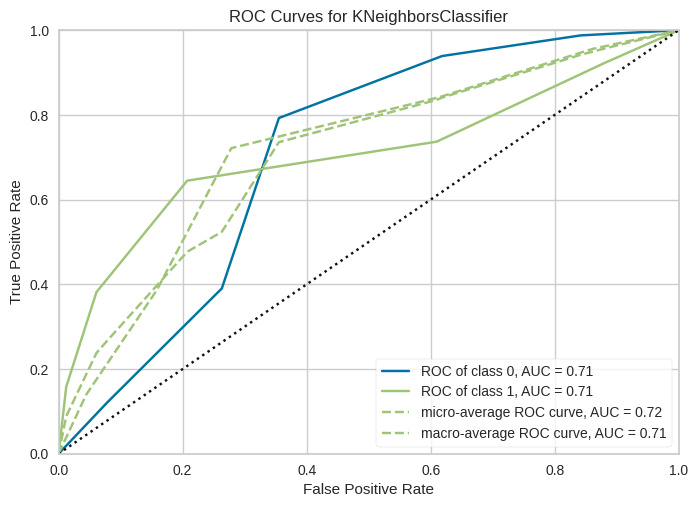

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_adasyn, y_train_adasyn)

KNN_prediction_adasyn = model_KNN.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, KNN_prediction_adasyn))
print()

(unique, counts) = np.unique(KNN_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, KNN_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for KNN model after ADASYN: ",roc_auc_score(y_test_adasyn, KNN_prediction_adasyn))
print()

roc_auc=ROCAUC(model_KNN)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

DECISION TREE

Accuracy =  0.6708860759493671

Count of predicted labels:  [0 1] [86 72]

Confusion Metrics after ADASYN: 
 [[58 24]
 [28 48]]

Precision Values for: 
  Healthy Patients with no disease = 0.6744186046511628
  Patients With Liver disease = 0.6666666666666666

Recall Values for: 
  Healthy Patients with no disease =  0.7073170731707317
  Healthy Patients With Liver disease =  0.631578947368421

F-Measure Values for: 
  Healthy Patients with no disease =  0.6904761904761904
  Patients with liver disease =  0.6486486486486486

ROC AUC score for Decision Tree model after ADASYN:  0.6694480102695763



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


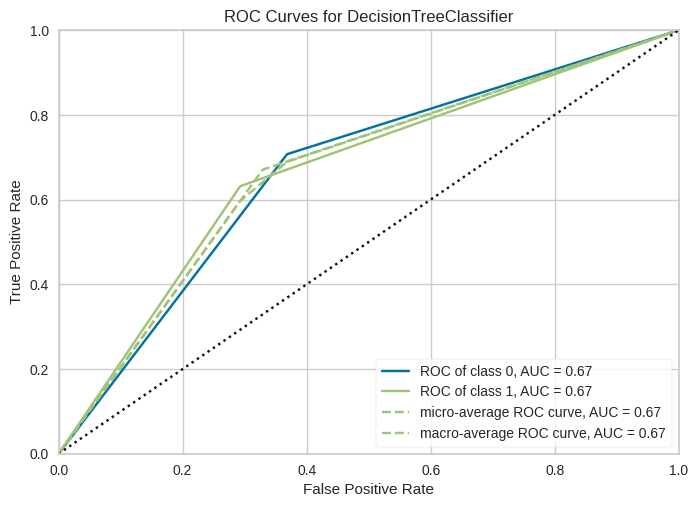

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [55]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_adasyn, y_train_adasyn)

DT_prediction_adasyn = model_DT.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, DT_prediction_adasyn))
print()

(unique, counts) = np.unique(DT_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, DT_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after ADASYN: ",roc_auc_score(y_test_adasyn, DT_prediction_adasyn))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

ADABOOST

Accuracy =  0.7215189873417721

Count of predicted labels:  [0 1] [88 70]

Confusion Metrics after ADABOOST: 
 [[63 19]
 [25 51]]

Precision Values for: 
  Healthy Patients with no disease = 0.7159090909090909
  Patients With Liver disease = 0.7285714285714285

Recall Values for: 
  Healthy Patients with no disease =  0.7682926829268293
  Healthy Patients With Liver disease =  0.6710526315789473

F-Measure Values for: 
  Healthy Patients with no disease =  0.7411764705882352
  Patients with liver disease =  0.6986301369863013

ROC AUC score for AdaBoost model after ADASYN:  0.7196726572528883



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


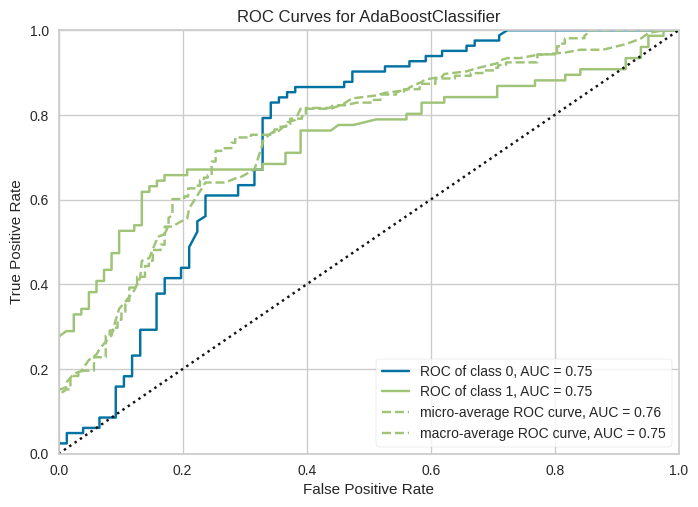

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [56]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_adasyn, y_train_adasyn)

AdaBoost_prediction_adasyn = model_AdaBoost.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, AdaBoost_prediction_adasyn))
print()

(unique, counts) = np.unique(AdaBoost_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, AdaBoost_prediction_adasyn)
print("Confusion Metrics after ADABOOST: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for AdaBoost model after ADASYN: ",roc_auc_score(y_test_adasyn, AdaBoost_prediction_adasyn))
print()

roc_auc=ROCAUC(model_AdaBoost)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

XGBOOST

Accuracy =  0.7974683544303798

Count of predicted labels:  [0 1] [88 70]

Confusion Metrics after ADASYN: 
 [[69 13]
 [19 57]]

Precision Values for: 
  Healthy Patients with no disease = 0.7840909090909091
  Patients With Liver disease = 0.8142857142857143

Recall Values for: 
  Healthy Patients with no disease =  0.8414634146341463
  Healthy Patients With Liver disease =  0.75

F-Measure Values for: 
  Healthy Patients with no disease =  0.8117647058823529
  Patients with liver disease =  0.7808219178082193

ROC AUC score for XGBOOST model after ADASYN:  0.7957317073170731



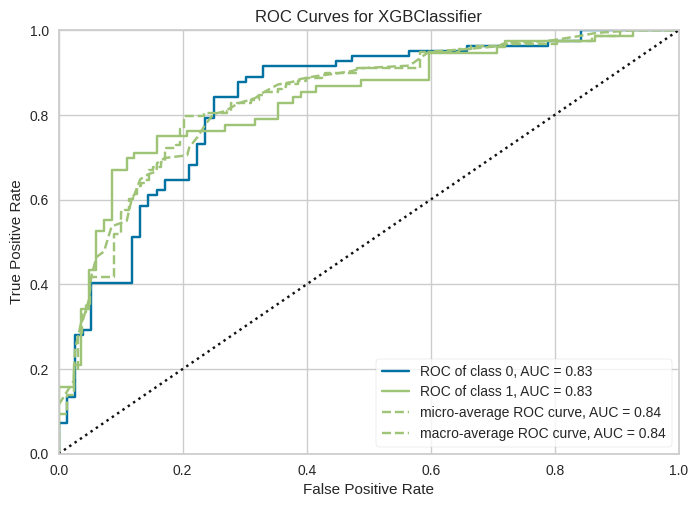

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_adasyn, y_train_adasyn)

XGB_prediction_adasyn = model_XGB.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, XGB_prediction_adasyn))
print()

(unique, counts) = np.unique(XGB_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, XGB_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBOOST model after ADASYN: ",roc_auc_score(y_test_adasyn, XGB_prediction_adasyn))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

#Technique 4: Up-sample minority class

In [58]:
from sklearn.utils import resample
print(df['Label'].value_counts())

1    406
0    164
Name: Label, dtype: int64


In [59]:
df_majority = df[df['Label'] == 1]  #Separate majority and minority classes
df_minority = df[df['Label'] == 0]

# Upsample minority class and other classes separately If not, random samples from combined classes
# will be duplicated and we run into same issue as before, undersampled remians undersampled.
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=406,    # to match average class
                                 random_state=42) # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled]) # Combine majority class with upsampled minority class
print(df_upsampled['Label'].value_counts())

Y_upsampled = df_upsampled["Label"].values

X_upsampled = df_upsampled.drop(labels = ["Label", "Gender"], axis=1)
X_upsampled = normalize(X_upsampled, axis=1)

X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, Y_upsampled, test_size=0.2, random_state=20)

1    406
0    406
Name: Label, dtype: int64


Logistic Regression

Accuracy: 0.6073619631901841

Count of predicted label: [0 1] [114  49]

Confusion Metrics: 
 [[64 14]
 [50 35]]

Precision Values for: 
  Healthy Patients with no disease = 0.5614035087719298
  Patients With Liver disease = 0.7142857142857143

Recall Values for: 
  Healthy Patients with no disease =  0.8205128205128205
  Healthy Patients With Liver disease =  0.4117647058823529

F-Measure Values for: 
  Healthy Patients with no disease =  0.6666666666666666
  Patients with liver disease =  0.5223880597014926

ROC AUC score for Logistic Regression model after upsampling:  0.6161387631975866



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


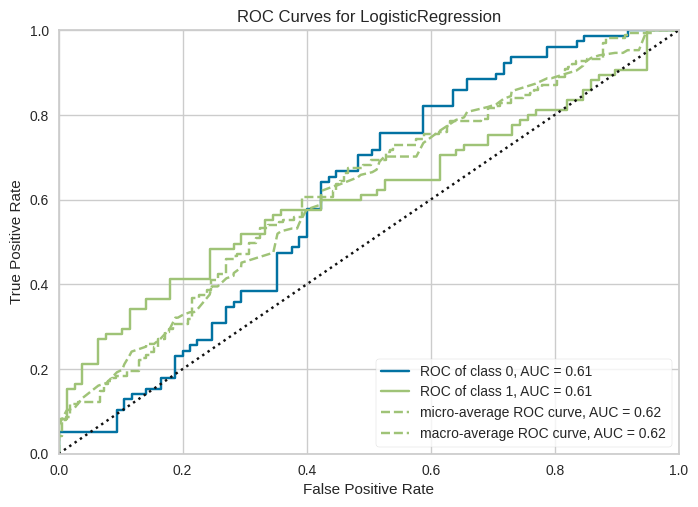

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [60]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_upsampled, y_train_upsampled)
LR_prediction_upsampling = model_LR.predict(X_test_upsampled)

accuracy = metrics.accuracy_score(y_test_upsampled, LR_prediction_upsampling)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_upsampling, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, LR_prediction_upsampling)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after upsampling: ", roc_auc_score(y_test_upsampled, LR_prediction_upsampling))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

SVM

In [61]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_upsampled, y_train_upsampled)
SVM_prediction_upsampling = model_SVM.predict(X_test_upsampled)

accuracy = metrics.accuracy_score(y_test_upsampled, SVM_prediction_upsampling) # Calculate the accuracy of the SVM model after SMOTE
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(SVM_prediction_upsampling, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, SVM_prediction_upsampling)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for SVM model after upsampling: ", roc_auc_score(y_test_upsampled, SVM_prediction_upsampling))


Accuracy: 0.5766871165644172

Count of predicted label: [0 1] [137  26]

Confusion Metrics: 
 [[73  5]
 [64 21]]

Precision Values for: 
  Healthy Patients with no disease = 0.5328467153284672
  Patients With Liver disease = 0.8076923076923077

Recall Values for: 
  Healthy Patients with no disease =  0.9358974358974359
  Healthy Patients With Liver disease =  0.24705882352941178

F-Measure Values for: 
  Healthy Patients with no disease =  0.6790697674418605
  Patients with liver disease =  0.3783783783783784

ROC AUC score for SVM model after upsampling:  0.5914781297134238


RANDOM FOREST

Accuracy =  0.8282208588957055

Count of predicted label: [0 1] [96 67]

Confusion Metrics: 
 [[73  5]
 [23 62]]

Precision Values for: 
  Healthy Patients with no disease = 0.7604166666666666
  Patients With Liver disease = 0.9253731343283582

Recall Values for: 
  Healthy Patients with no disease =  0.9358974358974359
  Healthy Patients With Liver disease =  0.7294117647058823

F-Measure Values for: 
  Healthy Patients with no disease =  0.8390804597701149
  Patients with liver disease =  0.8157894736842104

ROC AUC score for Random Forest model after upsampling:  0.8326546003016592



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


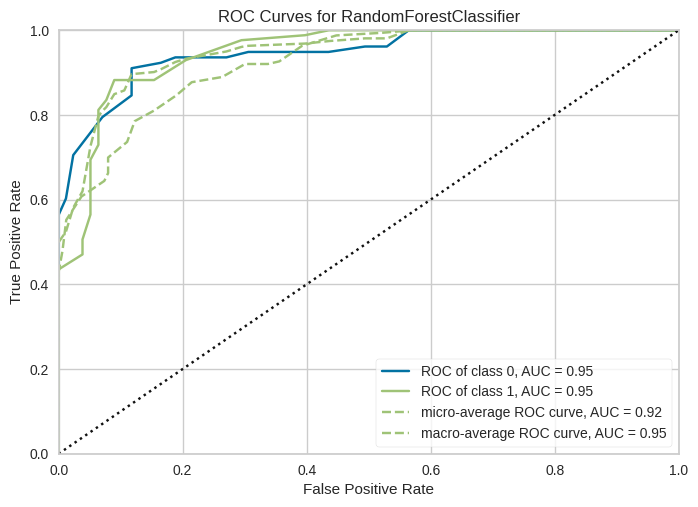

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [62]:
model_RF_upsampled = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF_upsampled.fit(X_train_upsampled, y_train_upsampled)
RF_prediction_upsampled = model_RF_upsampled.predict(X_test_upsampled)

print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, RF_prediction_upsampled))
print()

(unique, counts) = np.unique(RF_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, RF_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after upsampling: ", roc_auc_score(y_test_upsampled, RF_prediction_upsampled))
print()

roc_auc=ROCAUC(model_RF_upsampled)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

KNN

Accuracy =  0.6871165644171779

Count of predicted label: [0 1] [89 74]

Confusion Metrics: 
 [[58 20]
 [31 54]]

Precision Values for: 
  Healthy Patients with no disease = 0.651685393258427
  Patients With Liver disease = 0.7297297297297297

Recall Values for: 
  Healthy Patients with no disease =  0.7435897435897436
  Healthy Patients With Liver disease =  0.6352941176470588

F-Measure Values for: 
  Healthy Patients with no disease =  0.6946107784431138
  Patients with liver disease =  0.6792452830188679

ROC AUC score for KNN model after upsampling:  0.6894419306184012



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


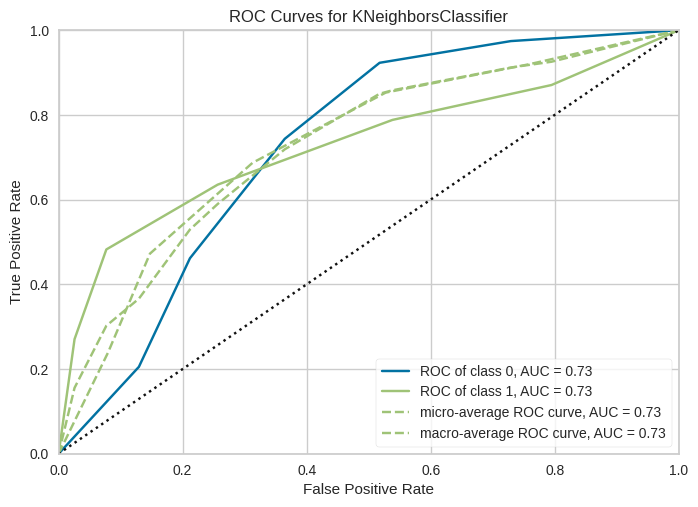

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [63]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_upsampled, y_train_upsampled)
KNN_prediction_upsampled = model_KNN.predict(X_test_upsampled)

print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, KNN_prediction_upsampled))
print()

(unique, counts) = np.unique(KNN_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, KNN_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for KNN model after upsampling: ", roc_auc_score(y_test_upsampled, KNN_prediction_upsampled))
print()

roc_auc=ROCAUC(model_KNN)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

DECISION TREE

Accuracy =  0.8343558282208589

Count of predicted label: [0 1] [99 64]

Confusion Metrics: 
 [[75  3]
 [24 61]]

Precision Values for: 
  Healthy Patients with no disease = 0.7575757575757576
  Patients With Liver disease = 0.953125

Recall Values for: 
  Healthy Patients with no disease =  0.9615384615384616
  Healthy Patients With Liver disease =  0.7176470588235294

F-Measure Values for: 
  Healthy Patients with no disease =  0.8474576271186441
  Patients with liver disease =  0.8187919463087248

ROC AUC score for Decision tree  model after upsampling:  0.8395927601809955



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


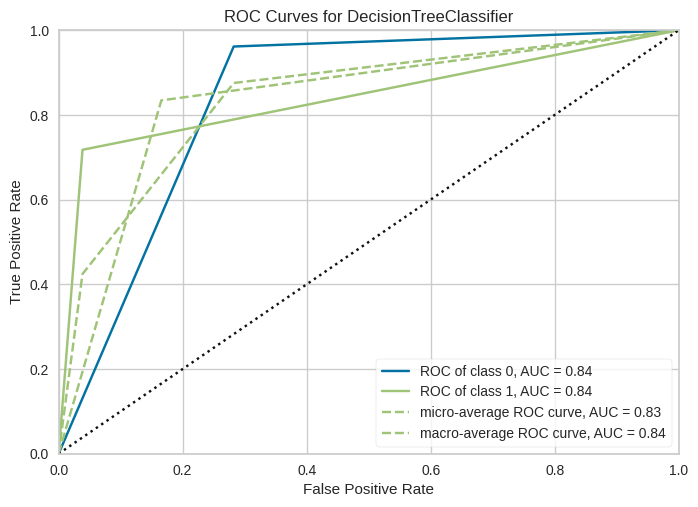

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_upsampled, y_train_upsampled)
DT_prediction_upsampled = model_DT.predict(X_test_upsampled)

print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, DT_prediction_upsampled))
print()

(unique, counts) = np.unique(DT_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, DT_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision tree  model after upsampling: ", roc_auc_score(y_test_upsampled, DT_prediction_upsampled))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

ADABOOST

Accuracy =  0.6993865030674846

Count of predicted label: [0 1] [81 82]

Confusion Metrics: 
 [[55 23]
 [26 59]]

Precision Values for: 
  Healthy Patients with no disease = 0.6790123456790124
  Patients With Liver disease = 0.7195121951219512

Recall Values for: 
  Healthy Patients with no disease =  0.7051282051282052
  Healthy Patients With Liver disease =  0.6941176470588235

F-Measure Values for: 
  Healthy Patients with no disease =  0.6918238993710691
  Patients with liver disease =  0.7065868263473054

ROC AUC score for Adaboost model after upsampling:  0.6996229260935143



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


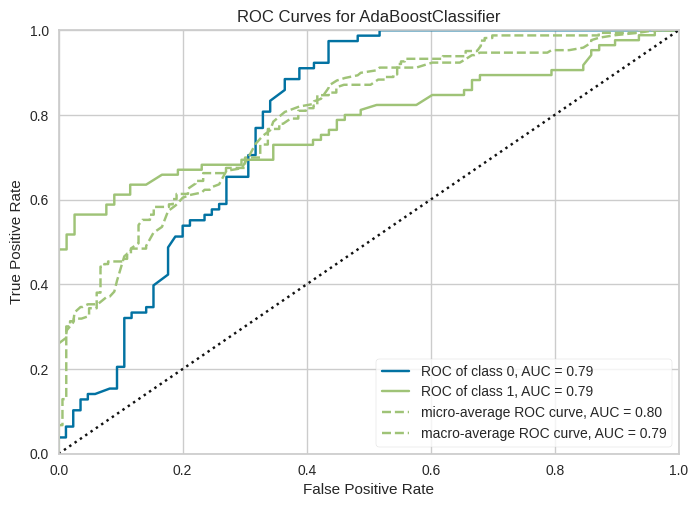

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [65]:
model_Adaboost = AdaBoostClassifier()
model_Adaboost.fit(X_train_upsampled, y_train_upsampled)
Adaboost_prediction_upsampled = model_Adaboost.predict(X_test_upsampled)
print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, Adaboost_prediction_upsampled))
print()

(unique, counts) = np.unique(Adaboost_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_upsampled, Adaboost_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Adaboost model after upsampling: ", roc_auc_score(y_test_upsampled, Adaboost_prediction_upsampled))
print()

roc_auc=ROCAUC(model_Adaboost)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

XGBOOST

Accuracy =  0.8220858895705522

Count of predicted label: [0 1] [97 66]

Confusion Metrics: 
 [[73  5]
 [24 61]]

Precision Values for: 
  Healthy Patients with no disease = 0.7525773195876289
  Patients With Liver disease = 0.9242424242424242

Recall Values for: 
  Healthy Patients with no disease =  0.9358974358974359
  Healthy Patients With Liver disease =  0.7176470588235294

F-Measure Values for: 
  Healthy Patients with no disease =  0.8342857142857143
  Patients with liver disease =  0.8079470198675496

ROC AUC score for XGB model after upsampling:  0.8267722473604827



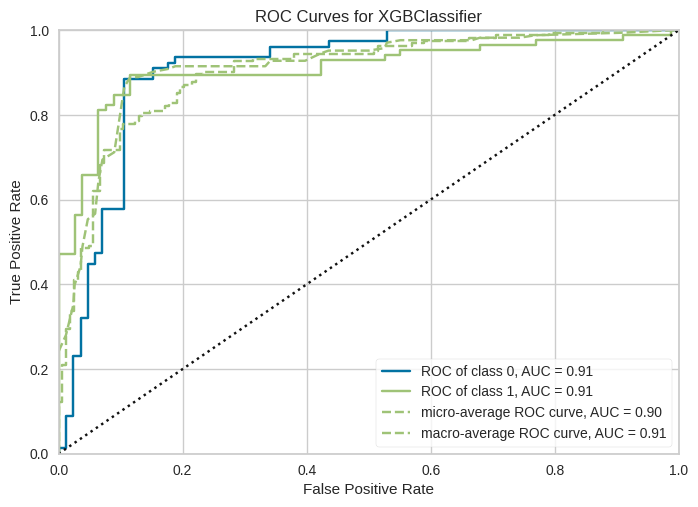

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [66]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_upsampled, y_train_upsampled)
XGB_prediction_upsampled = model_XGB.predict(X_test_upsampled)
print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, XGB_prediction_upsampled))
print()

(unique, counts) = np.unique(XGB_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_upsampled, XGB_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGB model after upsampling: ", roc_auc_score(y_test_upsampled, XGB_prediction_upsampled))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

#ENSEMBLE METHODS

In [67]:
# AVERAGING METHOD
from sklearn.metrics import mean_squared_error

pred1 = LR_prediction_upsampling
pred2 = SVM_prediction_upsampling
pred3 = RF_prediction_upsampled

pred_final = (pred1+pred2+pred3)/3.0

# printing the mean squared error between real value and predicted value
print(mean_squared_error(y_test_upsampled, pred_final))

0.24471710974778457


In [68]:
# MAX VOTING
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier

model_1 = model_LR
model_2 = model_SVM
model_3 = model_RF

# Making the final model using voting classifier
final_model = VotingClassifier(estimators=[('logr', model_1), ('svm', model_2), ('rf', model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(X_train_upsampled, y_train_upsampled)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test_upsampled)

# printing log loss between actual and predicted value
print(log_loss(y_test_upsampled, pred_final))

12.604222350795569


In [69]:
# VOTING ENSEMBLE
from sklearn import model_selection
seed = 42
kfold = model_selection.KFold(n_splits=20)

estimators = [] # create different models

model_1 = LogisticRegression(); estimators.append(('logistic',model_1))
model_2 = SVC(); estimators.append(('svm',model_2))
model_3 = RandomForestClassifier(); estimators.append(('rf',model_3))

from sklearn.ensemble import VotingClassifier # create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train_upsampled, y_train_upsampled, cv=kfold)
print(results.mean())

0.6526041666666667


 # k-folds validation

 RANDOM FOREST model (After SMOTEENN)

In [70]:
from sklearn.model_selection import cross_val_score
#In general, the more folds we use in k-fold cross-validation the lower the bias of the test MSE
#but the higher the variance. Conversely, the fewer folds we use the higher the bias but the lower the variance

scores = cross_val_score(model_RF, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_RF, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_RF, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

Cross_Val_Scores: 
 [0.66363636 0.55151515 0.66363636 0.88787879 0.32727273 0.43939394
 0.55952381 0.55952381 0.44940476 0.88571429]

MEAN: 0.5987499999999999

Predicted_Cross_Val_Scores: 
 [0.91891892 0.89189189 0.91891892 0.97297297 0.83783784 0.86486486
 0.89189189 0.89189189 0.86486486 0.97222222]

MEAN: 0.9026276276276276


KFold on Logestic Regression model

In [71]:
scores = cross_val_score(model_LR, X_resampled, y_resampled, scoring='r2', cv=10)
#print(scores)
#print(np.mean(scores))

pred = cross_val_predict(model_LR, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_LR, X_resampled, y_resampled, cv=10)
#print(scores_test)

print(np.mean(scores_test))

0.7373123123123123


KFold on SVM model

In [72]:
scores = cross_val_score(model_SVM, X_resampled, y_resampled, scoring='r2', cv=10)
#print(scores)
#print(np.mean(scores))

pred = cross_val_predict(model_SVM, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_SVM, X_resampled, y_resampled, cv=10)
#print(scores_test)

print(np.mean(scores_test))

0.732057057057057


In [73]:
scores = cross_val_score(model_KNN, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_KNN, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_KNN, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

Cross_Val_Scores: 
 [0.43939394 0.77575758 0.77575758 0.1030303  0.43939394 0.1030303
 0.55952381 0.33928571 0.66964286 0.88571429]

MEAN: 0.5090530303030303

Predicted_Cross_Val_Scores: 
 [0.86486486 0.94594595 0.94594595 0.78378378 0.86486486 0.78378378
 0.89189189 0.83783784 0.91891892 0.97222222]

MEAN: 0.881006006006006


In [74]:
scores = cross_val_score(model_DT, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

pred = cross_val_predict(model_DT, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_DT, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

Cross_Val_Scores: 
 [ 0.66363636  0.21515152  0.66363636  0.77575758  0.43939394  0.32727273
  0.33928571  0.44940476 -0.10119048  0.54285714]

MEAN: 0.43152056277056267

Predicted_Cross_Val_Scores: 
 [0.91891892 0.78378378 0.89189189 0.94594595 0.83783784 0.81081081
 0.83783784 0.89189189 0.75675676 0.88888889]

MEAN: 0.8564564564564565


In [75]:
scores = cross_val_score(model_AdaBoost, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_AdaBoost, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_AdaBoost, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

Cross_Val_Scores: 
 [0.32727273 0.1030303  0.43939394 0.88787879 0.43939394 0.32727273
 0.33928571 0.44940476 0.55952381 0.65714286]

MEAN: 0.45295995670995665

Predicted_Cross_Val_Scores: 
 [0.83783784 0.78378378 0.86486486 0.97297297 0.86486486 0.83783784
 0.83783784 0.86486486 0.89189189 0.91666667]

MEAN: 0.8673423423423424


In [76]:
scores = cross_val_score(model_XGB, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

pred = cross_val_predict(model_XGB, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_XGB, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

Cross_Val_Scores: 
 [0.66363636 0.55151515 0.77575758 0.88787879 0.43939394 0.43939394
 0.7797619  0.55952381 0.44940476 0.88571429]

MEAN: 0.6431980519480518

Predicted_Cross_Val_Scores: 
 [0.91891892 0.89189189 0.94594595 0.97297297 0.86486486 0.86486486
 0.94594595 0.89189189 0.86486486 0.97222222]

MEAN: 0.9134384384384383


 # k-folds validation on Random Forest model(after Upsampling)

In [77]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_RF, X_upsampled, Y_upsampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_RF, X_upsampled, Y_upsampled)
#print(pred)

scores_test = cross_val_score(model_RF, X_upsampled, Y_upsampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

Cross_Val_Scores: 
 [0.41463415 0.31707317 0.65426829 0.30853659 0.11097561 0.30853659
 0.06158537 0.06158537 0.65426829 0.65426829]

MEAN: 0.3545731707317074

Predicted_Cross_Val_Scores: 
 [0.85365854 0.82926829 0.91358025 0.82716049 0.77777778 0.82716049
 0.7654321  0.7654321  0.91358025 0.91358025]

MEAN: 0.8386630532971996
